<a href="https://colab.research.google.com/github/adityafsyah/adityafsyah/blob/main/KSU6__CloudBigData_ADITYA_FIRMANSYAH_WEEK_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from pandas import Series
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from datetime import datetime
import warnings
import sys
import itertools
import seaborn as sns
%matplotlib inline

In [ ]:
# Load and prepare the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KOICA2024/data-koica/candy_production.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

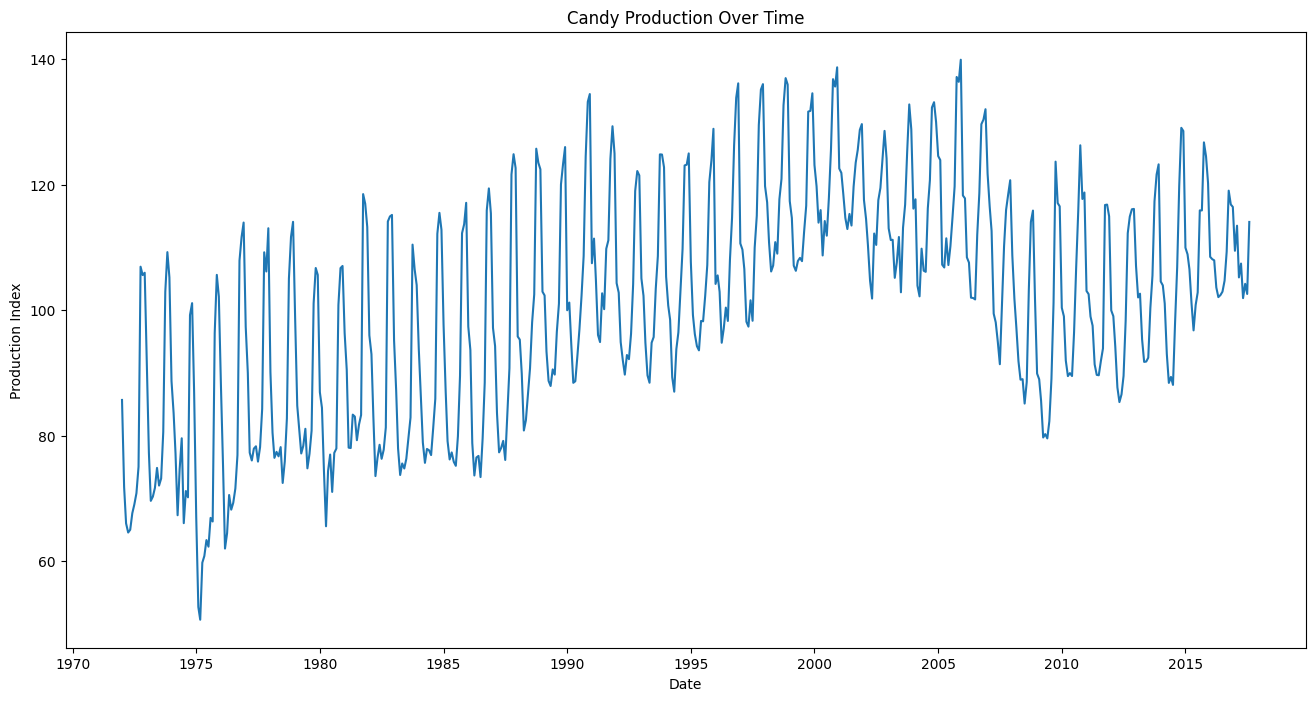

In [ ]:
# Visualize the time series
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['IPG3113N'])
plt.title('Candy Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production Index')
plt.show()

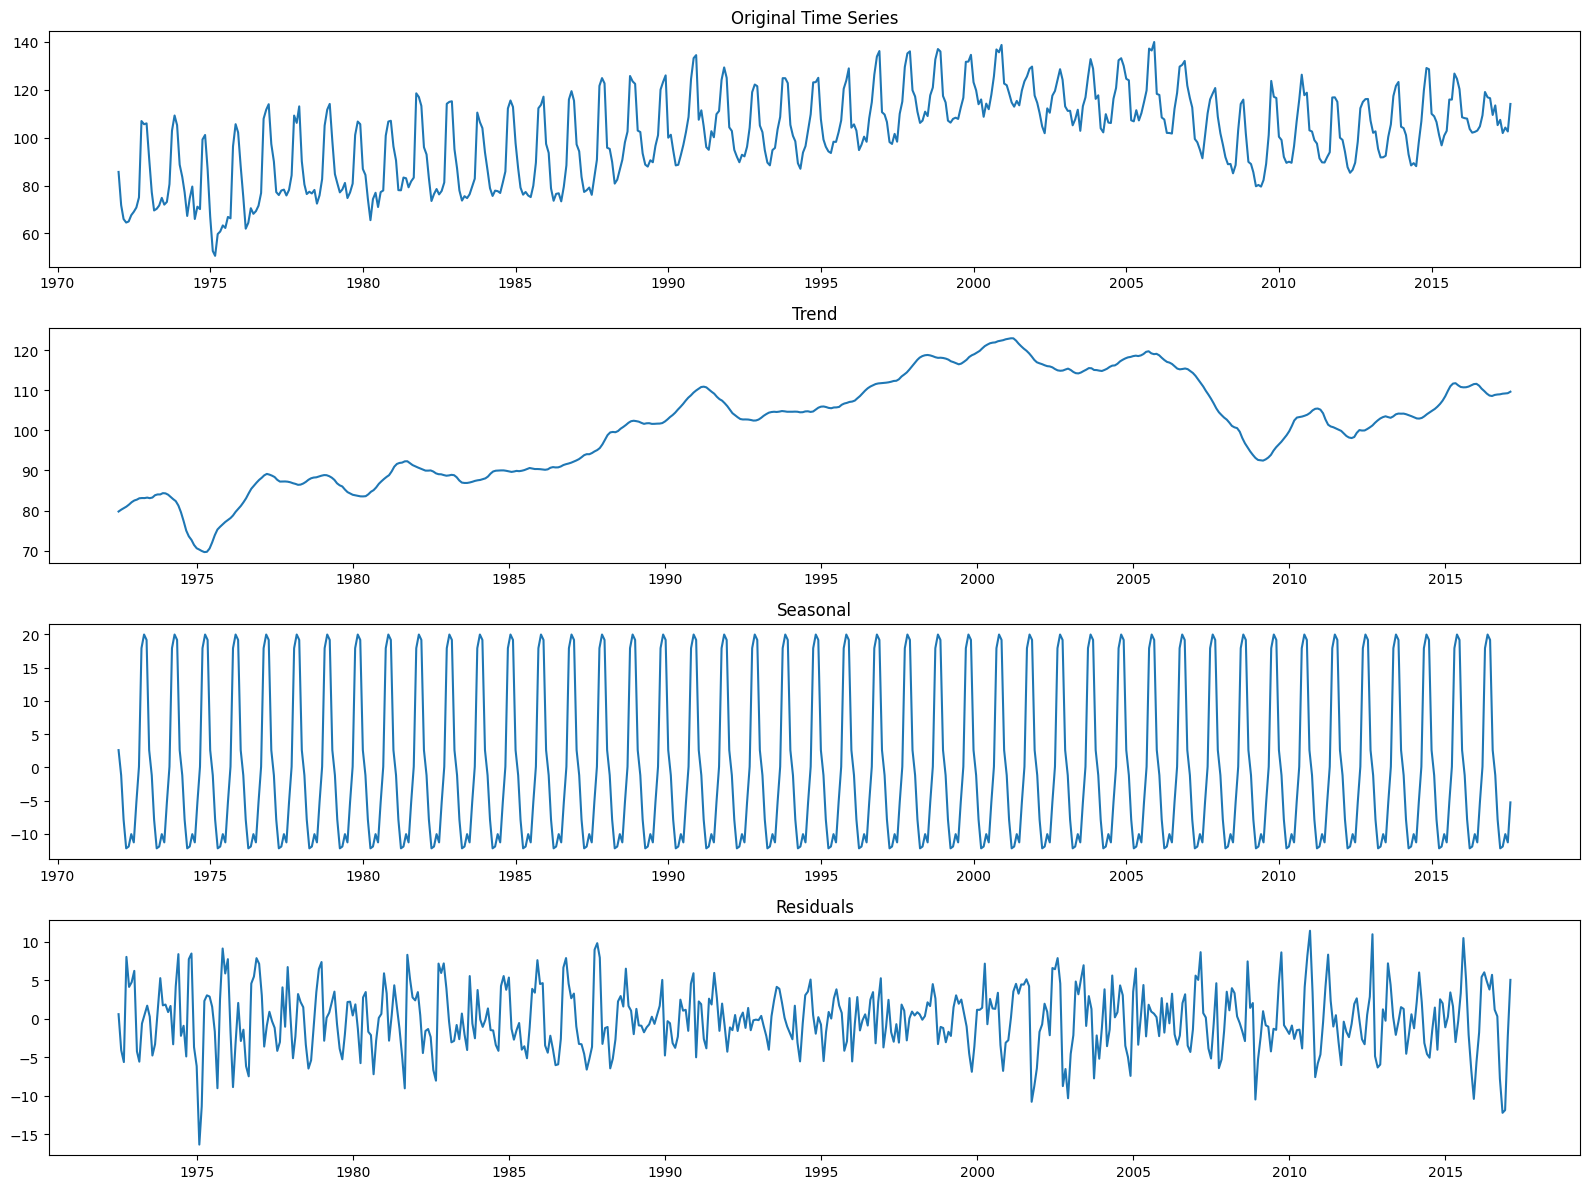

In [ ]:
# Seasonal Decomposition
decomposition = seasonal_decompose(df['IPG3113N'], period=12)
plt.figure(figsize=(16, 12))
plt.subplot(411)
plt.plot(df.index, df['IPG3113N'])
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()


In [ ]:
# Split the data (80% train, 20% test)
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

In [ ]:
# Function to calculate metrics
def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted) * 100
    mse = mean_squared_error(actual, predicted)
    rmse = sqrt(mse)
    return mae, mape, mse, rmse

In [ ]:
# HoltWinters Model
hw_model = ExponentialSmoothing(
    train['IPG3113N'],
    seasonal_periods=12,
    trend='add',
    seasonal='add'
).fit()

hw_forecast = hw_model.forecast(len(test))

In [ ]:
# SARIMAX Model
pred_start = pd.to_datetime('2019-01-01')

sarimax_model = SARIMAX(
    df['IPG3113N'],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
).fit()

sarimax_forecast = sarimax_model.get_forecast(steps=200)
sarimax_pred = sarimax_forecast.predicted_mean
sarimax_test_pred = sarimax_pred[:len(test)]

In [ ]:
# Calculate metrics
hw_mae, hw_mape, hw_mse, hw_rmse = calculate_metrics(test['IPG3113N'], hw_forecast)
sarimax_mae, sarimax_mape, sarimax_mse, sarimax_rmse = calculate_metrics(test['IPG3113N'], sarimax_test_pred)

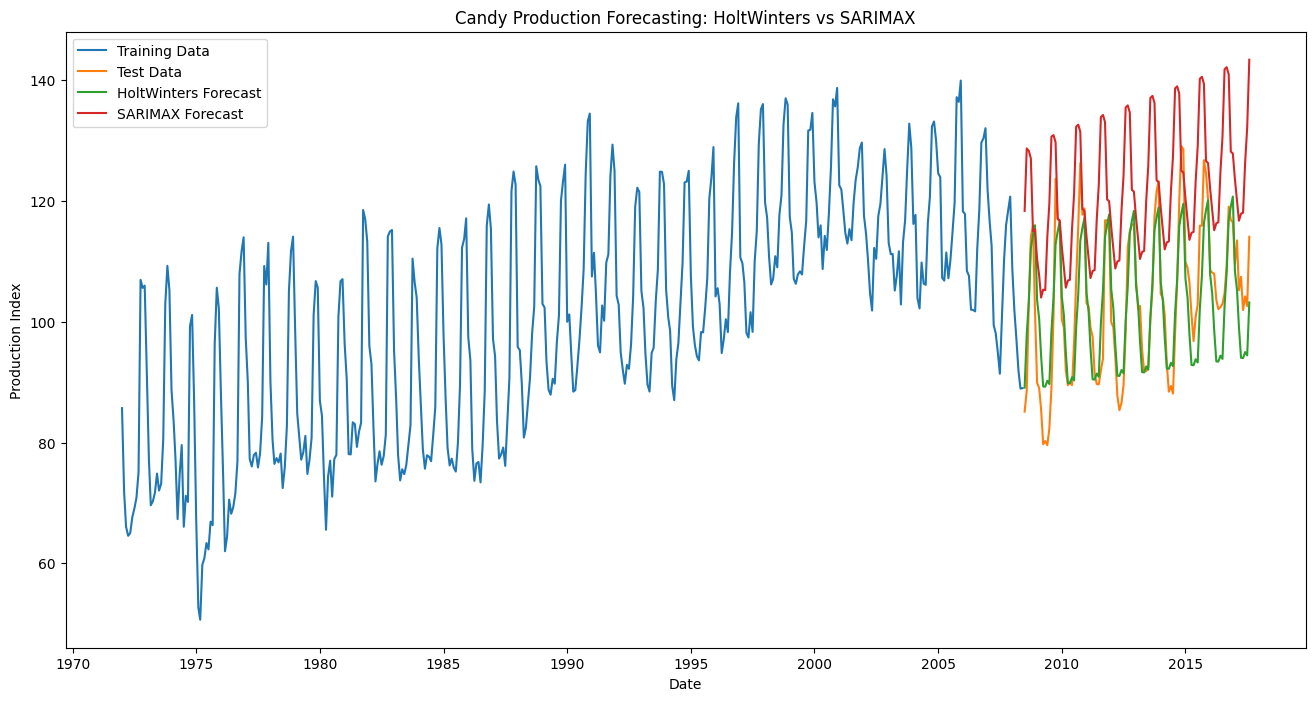

In [ ]:
# Visualize forecasts
plt.figure(figsize=(16, 8))
plt.plot(train.index, train['IPG3113N'], label='Training Data')
plt.plot(test.index, test['IPG3113N'], label='Test Data')
plt.plot(test.index, hw_forecast, label='HoltWinters Forecast')
plt.plot(test.index, sarimax_test_pred, label='SARIMAX Forecast')
plt.title('Candy Production Forecasting: HoltWinters vs SARIMAX')
plt.xlabel('Date')
plt.ylabel('Production Index')
plt.legend()
plt.show()

In [ ]:
# Print metrics
print("\nHoltWinters Metrics:")
print(f"MAE: {hw_mae:.2f}")
print(f"MAPE: {hw_mape:.2f}%")
print(f"MSE: {hw_mse:.2f}")
print(f"RMSE: {hw_rmse:.2f}")

print("\nSARIMAX Metrics:")
print(f"MAE: {sarimax_mae:.2f}")
print(f"MAPE: {sarimax_mape:.2f}%")
print(f"MSE: {sarimax_mse:.2f}")
print(f"RMSE: {sarimax_rmse:.2f}")


HoltWinters Metrics:
MAE: 4.93
MAPE: 4.84%
MSE: 39.58
RMSE: 6.29

SARIMAX Metrics:
MAE: 18.45
MAPE: 18.87%
MSE: 465.60
RMSE: 21.58
